In [12]:
import sys
sys.path.append('../src')
import argparse
from operator import itemgetter
import nltk
from features import sent2labels, sent2features
from active_learning_model import ALModel
from random_sampling_model import RSModel
import matplotlib.pyplot as plt
import numpy as np
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
labeled_size = 10
pool_size = -1 * labeled_size - 1
test_size = -1

In [9]:
# Create Dataset
labeled_sents = list(nltk.corpus.conll2002.iob_sents('esp.train'))[0:labeled_size]
pool_sents = list(nltk.corpus.conll2002.iob_sents('esp.train'))[labeled_size:labeled_size+pool_size]
test_sents = list(nltk.corpus.conll2002.iob_sents('esp.testb'))[0:test_size]

# Convert sentence to features
X_labeled = [sent2features(s) for s in labeled_sents]
y_labeled = [sent2labels(s) for s in labeled_sents]
X_pool = [sent2features(s) for s in pool_sents]
y_pool = [sent2labels(s) for s in pool_sents]
X_test = [sent2features(s) for s in test_sents]
y_test = [sent2labels(s) for s in test_sents]

# Training
al_model = ALModel(X_labeled, y_labeled, X_pool, y_pool, 5)
rs_model = RSModel(X_labeled, y_labeled, X_pool, y_pool, 5)

al_score = []
rs_score = []
al_score.append(al_model.evaluation(X_test, y_test))
rs_score.append(rs_model.evaluation(X_test, y_test))
for _ in range(50):
    al_model.query_selection()
    al_model.fit()
    al_score.append(al_model.evaluation(X_test, y_test))
    rs_model.query_selection()
    rs_model.fit()
    rs_score.append(rs_model.evaluation(X_test, y_test))

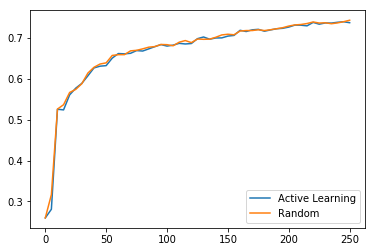

In [24]:
left = np.arange(51) * 5
p1 = plt.plot(left, al_score)
p2 = plt.plot(left, rs_score)
plt.legend((p1[0], p2[0]), ("Active Learning", "Random"), loc=4)